<h2 align='center'><a>Predict survival on the Titanic</h2>

#### Data Dictionary

* Survived = 	(0 = No, 1 = Yes)

* pclass(Ticket class) = 	1 = 1st, 2 = 2nd, 3 = 3rd

* sex = Sex

* Age = Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation  =C = Cherbourg, Q = Queenstown, S = Southampton

#### Importing Basic Libraries 

In [1]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Ingestion 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Creating UDF's For Summary of the data 

In [6]:
def continuous_summary(x):
    return pd.Series([x.count(),x.isna().sum(),x.isna().sum()/x.isna().count(),x.mean(),x.var(),x.std(),x.min(),
                      x.quantile(0.01),x.quantile(.10),x.quantile(.25),x.quantile(.5),x.quantile(.75),
                      x.quantile(.90),x.quantile(.99),x.max()],
                    index = ['N','NMISS','%NMISS','MEAN','VAR','STD','MIN','P1','P10','P25','P50','P75','P90','P99','MAX'])

In [7]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [8]:
def missing_impute(x,stats = 'mean'):
    if (x.dtypes == 'float64')|(x.dtypes=='int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

#### Exploratory Data Analysis 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Splitting the data into continuous and categorical 
Train_cont = train[['Age','SibSp','Parch','Fare']]
Train_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [11]:
Train_cont.apply(continuous_summary)

,Age,SibSp,Parch,Fare
N,714.000000,891.000000,891.000000,891.000000
NMISS,177.000000,0.000000,0.000000,0.000000
%NMISS,0.198653,0.000000,0.000000,0.000000
MEAN,29.699118,0.523008,0.381594,32.204208
VAR,211.019125,1.216043,0.649728,2469.436846
STD,14.526497,1.102743,0.806057,49.693429
MIN,0.420000,0.000000,0.000000,0.000000
P1,1.000000,0.000000,0.000000,0.000000
P10,14.000000,0.000000,0.000000,7.550000
P25,20.125000,0.000000,0.000000,7.910400


In [12]:
Train_cat.apply(categorical_var_summary) 

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
N,891.00,891.00,891,891,204,889
NMISS,0.00,0.00,0,0,687,2
MODE,0.00,3.00,male,CA. 2343,G6,S
FREQ,549.00,491.00,577,7,4,644
PERCENT,61.62,55.11,64.76,0.79,1.96,72.44


#### From the above summaries we can see that we have missing values in Cabin, Age and Embarked

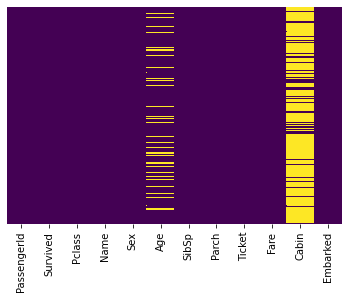

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')
plt.show()

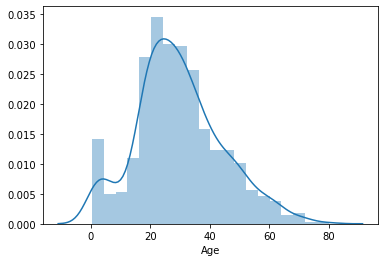

In [14]:
sns.distplot(Train_cont.Age)

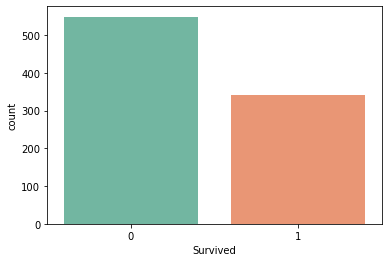

In [15]:
sns.countplot('Survived',data = Train_cat,palette =  'Set2')

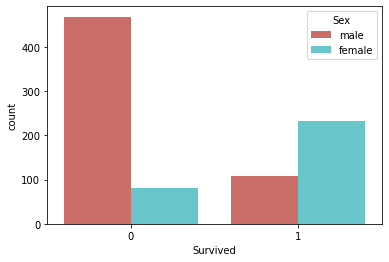

In [16]:
sns.countplot('Survived', hue = 'Sex', data = Train_cat,palette =  'hls')

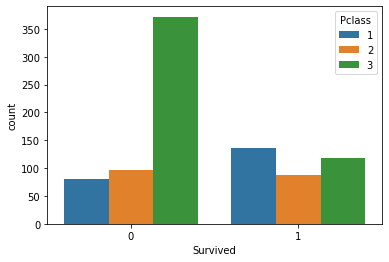

In [17]:
sns.countplot('Survived', hue = 'Pclass', data = Train_cat,palette = 'tab10')

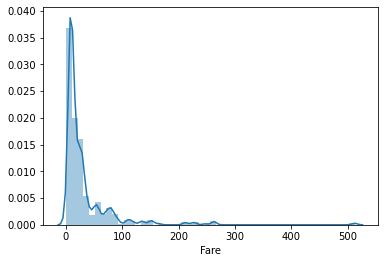

In [18]:
sns.distplot(Train_cont.Fare)

#### Handling Missing Values  

In [19]:
Train_cont = Train_cont.apply(missing_impute)

In [20]:
Train_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [21]:
Train_cat["Embarked"] = Train_cat["Embarked"].fillna(Train_cat.Embarked.mode())

<ipython-input-21-ff74b318dff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_cat["Embarked"] = Train_cat["Embarked"].fillna(Train_cat.Embarked.mode())


In [22]:
Train_cat.drop('Cabin',axis = 1,inplace = True)

C:\Users\jagz.000\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
Train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Ticket    891 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(2), object(3)
memory usage: 34.9+ KB


In [24]:
train = pd.concat([Train_cat,Train_cont],axis = 1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Ticket    891 non-null    object 
 4   Embarked  889 non-null    object 
 5   Age       891 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [26]:
train.dropna(inplace = True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Ticket    889 non-null    object 
 4   Embarked  889 non-null    object 
 5   Age       889 non-null    float64
 6   SibSp     889 non-null    int64  
 7   Parch     889 non-null    int64  
 8   Fare      889 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


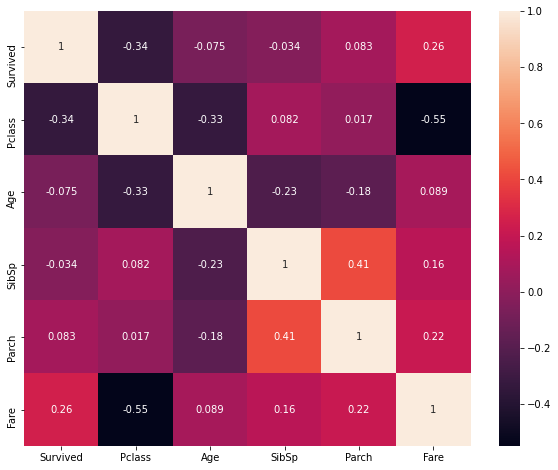

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot  = True)

In [29]:
train.drop(['Ticket'],axis = 1,inplace = True)

In [30]:
train

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,3,male,S,22.000000,1,0,7.2500
1,1,1,female,C,38.000000,1,0,71.2833
2,1,3,female,S,26.000000,0,0,7.9250
3,1,1,female,S,35.000000,1,0,53.1000
4,0,3,male,S,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,male,S,27.000000,0,0,13.0000
887,1,1,female,S,19.000000,0,0,30.0000
888,0,3,female,S,29.699118,1,2,23.4500
889,1,1,male,C,26.000000,0,0,30.0000


In [31]:
def dumm_y(df,colname):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis = 1)
    df.drop(colname,axis = 1,inplace = True)
    return df

In [32]:
for i in train.select_dtypes(['object']).columns:
    train = dumm_y(train,i)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=567)

In [36]:
print("Shape of the X_train  is :",X_train.shape)
print("Shape of the X_test  is :",X_test.shape)
print("Shape of the y_train  is :",y_train.shape)
print("Shape of the y_test  is :",y_test.shape)

Shape of the X_train  is : (711, 8)
Shape of the X_test  is : (178, 8)
Shape of the y_train  is : (711,)
Shape of the y_test  is : (178,)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [40]:
param = {'n_estimators' : [100,125,150],
      'max_features' : [4,5,6]}

RF = GridSearchCV(estimator = RandomForestClassifier(random_state = 567), 
                    param_grid = param,
                    cv = 5,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(scaled_X_train, y_train)

In [41]:
RF.best_params_

{'max_features': 4, 'n_estimators': 100}

In [42]:
RF.best_score_

0.8580984122191457

In [43]:
rf = RF.best_estimator_
rf.fit(scaled_X_train, y_train)

#Getting predicted values for test data
rf_pred_y = rf.predict(scaled_X_test)

In [44]:
print('For Train -')
print('Accuracy : ', metrics.accuracy_score(y_train, rf.predict(X_train)))
print('AUC : ', metrics.roc_auc_score(y_train, rf.predict(X_train)))
print('For Test -')
rf_acc = metrics.accuracy_score(y_test, rf_pred_y)
print('Accuracy : ', rf_acc)
print('AUC : ', metrics.roc_auc_score(y_test, rf_pred_y))
rf_log_loss = metrics.log_loss(y_test, rf.predict_proba(X_test))
print('Log Loss : ', rf_log_loss)

For Train -
Accuracy :  0.6244725738396625
AUC :  0.5
For Test -
Accuracy :  0.7752808988764045
AUC :  0.753163731245923
Log Loss :  0.7097461735356239


In [45]:
logreg = LogisticRegression()

In [46]:
logreg.fit(scaled_X_train,y_train)

LogisticRegression()

In [47]:
y_pred= logreg.predict(scaled_X_test)

In [48]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred}).head(5)

,Y_Test,Y_Pred
568,0,0
185,0,0
632,1,1
570,1,0
876,0,0


In [49]:
accuracy_score(y_test, y_pred)

0.7921348314606742

In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.68      0.73        73

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [51]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=20,gamma=0.05,random_state=2317)

In [52]:
svm.fit(scaled_X_train,y_train)

SVC(C=20, gamma=0.05, random_state=2317)

In [53]:
y_pred= svm.predict(scaled_X_test)

In [54]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred}).head(5)

,Y_Test,Y_Pred
568,0,0
185,0,0
632,1,0
570,1,0
876,0,0


In [55]:
accuracy_score(y_test, y_pred)

0.8258426966292135